<font size="+3"><strong>Chocolate Bar Rating Analysis</strong></font>

### About Dataset
Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.

#### Flavors of Cacao Rating System:
* 5= Elite (Transcending beyond the ordinary limits)
* 4= Premium (Superior flavor development, character and style)
* 3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
* 2= Disappointing (Passable but contains at least one significant flaw)
* 1= Unpleasant (mostly unpalatable)

### Data description
* Company (Maker-if known) - Name of the company manufacturing the bar.
* Specific Bean Origin or Bar Name - The specific geo-region of origin for the bar.
* REF - Help us describe this column... What is it?
* Review Date - Date of publication of the review.
* Cocoa Percent - Cocoa percentage (darkness) of the chocolate bar being reviewed.
* Company Location - Manufacturer base country.
* Rating - Expert rating for the bar.
* Bean Type - The variety (breed) of bean used, if provided.
* Broad Bean Origin - The broad geo-region of origin for the bean.

In [1]:
# Import Matplotlib, pandas, and plotly
import matplotlib.pyplot as plt
import pandas as pd 
import plotly.express as px
import seaborn as sns

### Prepare Data

In this project, I'll work with the Chocolate Bar Rating dataset for exploring and visualization.

#### Import
Import the CSV file into the df 

In [2]:
df = pd.read_csv("./data/flavors_of_cacao.csv")

### Exploratory Data Analysis & Feature Engineering

Before I move to the next task, take a moment to inspect *df* using the *info* and *head/tail* methods. What issues do you see in the data? What cleaning will you need to do before you can conduct your analysis?

In [3]:
df.head()

,Company,Specific_Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Unknow,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Unknow,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Unknow,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,Unknow,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Unknow,Peru


In [4]:
df.shape

(1795, 9)

In [5]:
#Explore datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1795 non-null   object 
 1   Specific_Bean_Origin  1795 non-null   object 
 2   REF                   1795 non-null   int64  
 3   Review_Date           1795 non-null   int64  
 4   Cocoa_Percent         1795 non-null   object 
 5   Company_Location      1795 non-null   object 
 6   Rating                1795 non-null   float64
 7   Bean_Type             1794 non-null   object 
 8   Broad_Bean_Origin     1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [6]:
#Drop empty row to adjust all observations are the same.
df.dropna(inplace=True)

In [7]:
df.shape

(1793, 9)

In [8]:
# Explore description
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,1793,416,Soma,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Specific_Bean_Origin,1793,1038,Madagascar,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REF,1793.0,NaN,NaN,NaN,1036.126046,553.128742,5.0,576.0,1073.0,1502.0,1952.0
Review_Date,1793.0,NaN,NaN,NaN,2012.326269,2.928666,2006.0,2010.0,2013.0,2015.0,2017.0
Cocoa_Percent,1793,45,70%,671,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company_Location,1793,60,U.S.A.,763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,1793.0,NaN,NaN,NaN,3.185862,0.477668,1.0,3.0,3.25,3.5,5.0
Bean_Type,1793,41,Unknow,887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Broad_Bean_Origin,1793,98,Venezuela,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Before we continue - rename some columns, 
original_col = df.columns
new_col = ['Company', 'Bean_Origin', 'REF', 'Review_Date', 'Cocoa_Percent',
                'Company_Location', 'Rating', 'Bean_Types', 'Countries']
df = df.rename(columns=dict(zip(original_col, new_col)))


In [10]:
df.tail()

,Company,Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Types,Countries
1790,Zotter,Peru,647,2011,70%,Austria,3.75,Unknow,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,Unknow,India
1794,Zotter,"Brazil, Mitzi Blue",486,2010,65%,Austria,3.00,Unknow,Brazil


Now, we can see that there are 9 totals columns with *3* numeric data and *6* categoricals data. 
To explore with high or low percentage of cocoa include. So need to recastinate data type. 
Transform the "Coco_Percent" column of df so that all values are integer instead of strings.


In [11]:
# modify data types and remove "%"

df["Cocoa_Percent"] = (df["Cocoa_Percent"]
 .replace("%","",regex=True)
 .astype("float")
 )


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1793 non-null   object 
 1   Bean_Origin       1793 non-null   object 
 2   REF               1793 non-null   int64  
 3   Review_Date       1793 non-null   int64  
 4   Cocoa_Percent     1793 non-null   float64
 5   Company_Location  1793 non-null   object 
 6   Rating            1793 non-null   float64
 7   Bean_Types        1793 non-null   object 
 8   Countries         1793 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 140.1+ KB


In [13]:
#To check null values in County because we can see above info() there are one missing value in "Country and Bean_Type"?
df.isnull().value_counts().to_frame()


,,,,,,,,,0
Company,Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Types,Countries,
False,False,False,False,False,False,False,False,False,1793


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1793 non-null   object 
 1   Bean_Origin       1793 non-null   object 
 2   REF               1793 non-null   int64  
 3   Review_Date       1793 non-null   int64  
 4   Cocoa_Percent     1793 non-null   float64
 5   Company_Location  1793 non-null   object 
 6   Rating            1793 non-null   float64
 7   Bean_Types        1793 non-null   object 
 8   Countries         1793 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 140.1+ KB


**I found some complex data with *comma, blackets, many white space* in "Bean_Types and Country". "Bean_Types" column to create a "Bean_Type" column for df.
"Country" column to create a "Country" column for df.
I don't need to know too much. We create new columns just include one main type in [0].**

In [15]:
df["Bean_Type"] = (df["Bean_Types"]
                     .str.split(",",expand = True)[0]
                     .str.split(" ",expand = True)[0]
                     
                    )
df.head()

,Company,Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Types,Countries,Bean_Type
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Unknow,Sao Tome,Unknow
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Unknow,Togo,Unknow
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Unknow,Togo,Unknow
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Unknow,Togo,Unknow
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Unknow,Peru,Unknow


**Then let drop uncessary column Bean_Type.**

In [16]:
df.drop(columns=["Bean_Types"], inplace=True) #Droping the "Bean_type" column.

In [17]:
df.tail(10)

,Company,Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Countries,Bean_Type
1785,Zotter,Huiwani Coop,879,2012,75.0,Austria,3.00,Papua New Guinea,Criollo
1786,Zotter,El Ceibo Coop,879,2012,90.0,Austria,3.25,Bolivia,Unknow
1787,Zotter,Santo Domingo,879,2012,70.0,Austria,3.75,Dominican Republic,Unknow
1788,Zotter,"Kongo, Highlands",883,2012,68.0,Austria,3.25,Congo,Forastero
1789,Zotter,"Indianer, Raw",883,2012,58.0,Austria,3.50,Unknow,Unknow
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,Peru,Unknow
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Congo,Forastero
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,India,Forastero
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,India,Unknow
1794,Zotter,"Brazil, Mitzi Blue",486,2010,65.0,Austria,3.00,Brazil,Unknow


**I found some complex data with comma, white space in "Countries". "Countries" column to create a "Country" column for df.**

In [18]:
df["Country"] = (df["Countries"]
                     .str.split(",",expand = True)[0]
                     
                     
                    )
df.tail(10)

,Company,Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Countries,Bean_Type,Country
1785,Zotter,Huiwani Coop,879,2012,75.0,Austria,3.00,Papua New Guinea,Criollo,Papua New Guinea
1786,Zotter,El Ceibo Coop,879,2012,90.0,Austria,3.25,Bolivia,Unknow,Bolivia
1787,Zotter,Santo Domingo,879,2012,70.0,Austria,3.75,Dominican Republic,Unknow,Dominican Republic
1788,Zotter,"Kongo, Highlands",883,2012,68.0,Austria,3.25,Congo,Forastero,Congo
1789,Zotter,"Indianer, Raw",883,2012,58.0,Austria,3.50,Unknow,Unknow,Unknow
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,Peru,Unknow,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Congo,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,India,Forastero,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,India,Unknow,India
1794,Zotter,"Brazil, Mitzi Blue",486,2010,65.0,Austria,3.00,Brazil,Unknow,Brazil


**Then let drop uncessary column "Countries".**

In [19]:
df.drop(columns=["Countries"], inplace=True) #Droping the "Countries" column.

In [20]:
df.tail(30)

,Company,Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Country
1765,Zak's,"Belize, Batch 2",1578,2015,70.0,U.S.A.,3.50,Trinitario,Belize
1766,Zak's,"House Blend, Batch 2",1582,2015,60.0,U.S.A.,3.00,Unknow,Unknow
1767,Zart Pralinen,"Millot P., Ambanja",1820,2016,70.0,Austria,3.50,Criollo,Madagascar
1768,Zart Pralinen,UNOCACE,1824,2016,70.0,Austria,2.75,Nacional,Ecuador
1769,Zart Pralinen,San Juan Estate,1824,2016,85.0,Austria,2.75,Trinitario,Trinidad
1770,Zart Pralinen,"Kakao Kamili, Kilombero Valley",1824,2016,85.0,Austria,3.00,Criollo,Tanzania
1771,Zart Pralinen,"Kakao Kamili, Kilombero Valley",1824,2016,70.0,Austria,3.50,Criollo,Tanzania
1772,Zart Pralinen,"San Juan Estate, Gran Couva",1880,2016,78.0,Austria,3.50,Trinitario,Trinidad
1773,Zokoko,Guadalcanal,1716,2016,78.0,Australia,3.75,Unknow,Solomon Islands
1774,Zokoko,Goddess Blend,1780,2016,65.0,Australia,3.25,Unknow,Unknow


### Explore 

### Inspiration  Research Questions.
#### we can answer the following question.
* Is there any relationship between cocoa solids percentage and rating?
* Calculate the Pearson correlation coefficient for "Cocoa" and "Rating".
* Which countries produce the highest-rated bars?
* Which companies has the highest and lowest rating?


### Research question 1
Is there any relationship between cocoa solids percentage and rating?

Text(0.5, 1.0, 'Distribution of Cocoa%')

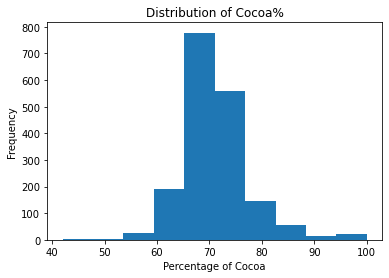

In [21]:
# Build histogram
plt.hist(df["Cocoa_Percent"])

# Label axes
plt.xlabel("Percentage of Cocoa")
plt.ylabel("Frequency")

# Add title
plt.title("Distribution of Cocoa%")



C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Expert Rating ')

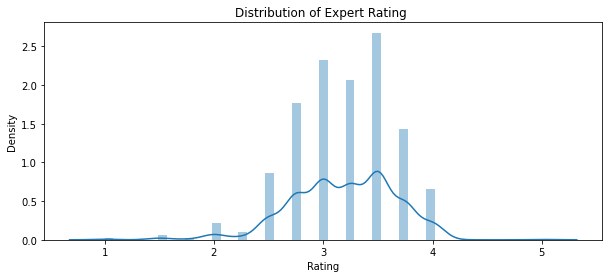

In [22]:

fig,ax = plt.subplots(figsize=(10,4))
sns.distplot(df["Rating"], ax=ax)
ax.set_title("Distribution of Expert Rating ")

Text(0.5, 1.0, 'Cocoa Percentage VS Rating')

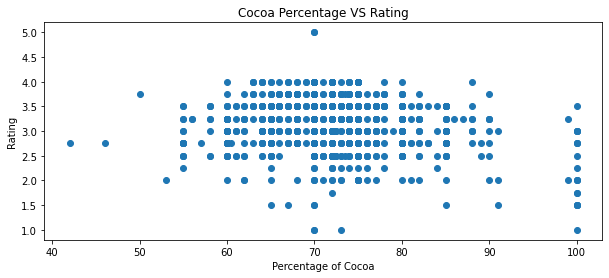

In [45]:
#build a scatter plot to see the relation between rating and cocoa percent.
fig, ax = plt.subplots(figsize = (10,4))
ax.scatter(
    x=df["Cocoa_Percent"], 
    y=df["Rating"]
)

#add axes
plt.xlabel("Percentage of Cocoa")
plt.ylabel("Rating")

#add title
plt.title("Cocoa Percentage VS Rating")

Let see, this scatterplot with no correlation has data that does not follow a pattern, neither positive nor negative.

### Research question 2
calculate the Pearson correlation coefficient for "Cocoa" and "Rating".
To decide how their correlation is weak/strong/perfect?

In [46]:
p_correlation = df["Cocoa_Percent"].corr(df["Rating"])
print(p_correlation)

-0.16475831754562748


The correlation coefficient is under 0, so there's a *very low relationship* cocoa percent and rating. Because rating is not decided by only cocoa percent.  

In [44]:
rate_by_country = list(df["Country"].unique())
rate_by_country

['Sao Tome',
 'Togo',
 'Peru',
 'Venezuela',
 'Cuba',
 'Panama',
 'Madagascar',
 'Brazil',
 'Ecuador',
 'Colombia',
 'Burma',
 'Papua New Guinea',
 'Bolivia',
 'Fiji',
 'Mexico',
 'Indonesia',
 'Trinidad',
 'Vietnam',
 'Nicaragua',
 'Tanzania',
 'Dominican Republic',
 'Ghana',
 'Belize',
 'Unknow',
 'Jamaica',
 'Grenada',
 'Guatemala',
 'Honduras',
 'Costa Rica',
 'Domincan Republic',
 'Haiti',
 'Congo',
 'Philippines',
 'Malaysia',
 'Gabon',
 'Ivory Coast',
 'Carribean',
 'Sri Lanka',
 'Puerto Rico',
 'Uganda',
 'Martinique',
 'Sao Tome & Principe',
 'Vanuatu',
 'Australia',
 'Liberia',
 'West Africa',
 'Hawaii',
 'Saint Lucia Lucia',
 'Cost Rica',
 'South America',
 'India',
 'Africa',
 'Tobago',
 'Trinidad-Tobago',
 'Solomon Islands',
 'Nigeria',
 'El Salvador',
 'Samoa',
 'Cameroon',
 'Venezuela/ Ghana',
 'Peru(SMartin',
 'Principe',
 'Central and S. America',
 'Carribean (Dominican Republic/Jam/Tri)',
 'Ghana & Madagascar',
 'Madagascar & Ecuador',
 'Suriname']

### Research question 3

Which countries produce the highest-rated bars?

In [25]:
rate_by_country = df["Country"].value_counts()
rate_by_country

Venezuela                                 224
Ecuador                                   195
Peru                                      171
Madagascar                                146
Dominican Republic                        143
                                         ... 
Burma                                       1
Carribean (Dominican Republic/Jam/Tri)      1
Ghana & Madagascar                          1
Madagascar & Ecuador                        1
Suriname                                    1
Name: Country, Length: 67, dtype: int64

In [26]:
df["Rating"].sort_values(ascending=False).value_counts()

3.50    392
3.00    341
3.25    303
2.75    259
3.75    210
2.50    126
4.00     97
2.00     32
2.25     14
1.50     10
1.00      4
1.75      3
5.00      2
Name: Rating, dtype: int64

In [27]:
mean_rating_by_country = df.groupby(["Country"])["Rating"].mean().sort_values(ascending=False).head(10)
mean_rating_by_country

Country
Tobago              3.625000
Venezuela/ Ghana    3.500000
South America       3.500000
Solomon Islands     3.437500
Haiti               3.388889
Honduras            3.350000
Guatemala           3.344828
Congo               3.325000
Vietnam             3.315789
Papua New Guinea    3.302326
Name: Rating, dtype: float64

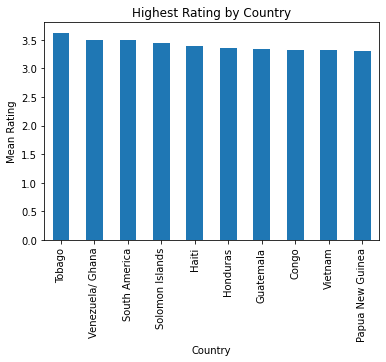

In [42]:
# Build bar chart, label axes, add title
mean_rating_by_country.plot(
        kind = "bar",
        xlabel = "Country",
        ylabel = "Mean Rating",
        title = "Highest Rating by Country",
        
);


### Research question 4
Which companies has the highest and lowest rating?

In [69]:
#to find the highest rating company
max_rating_company = df[df["Rating"] == df["Rating"].max()]["Company"]
max_rating_company

78    Amedei
86    Amedei
Name: Company, dtype: object

In [ ]:
max_rating_company = df[["Rating","Company"]].max(df["Rating"])
max_rating_company.to_frame()

In [47]:
#to find the lowest rating company
min_rating_company = df[df["Rating"] == df["Rating"].min()]["Company"]
min_rating_company

326               Callebaut
437         Claudio Corallo
465      Cote d' Or (Kraft)
1175    Neuhaus (Callebaut)
Name: Company, dtype: object

In [76]:
pd.concat([max_rating_company,min_rating_company], ignore_index=False, keys=["Highest Rating", "Lowest Rating"]).to_frame()

Company
Highest Rating 78                 Amedei
               86                 Amedei
Lowest Rating  326             Callebaut
               437       Claudio Corallo
               465    Cote d' Or (Kraft)
               1175  Neuhaus (Callebaut)